<font face='Liberation serif' size=4>**Описание: Приоритезация гипотез и анализ AB-теста.** Данные из интернет-магазина Есть два файла: гипотезы и заказы. Всего есть 9 гипотез, и нам нужно расставить их по приоритетам в соответствии с фреймворками RICE и ICE. «Гипотезы» включают четыре параметра: охват, влияние, уверенность и усилия. Второй набор данных содержит данные теста AB. Цель эксперимента - проверить, помогает ли нам новая регистрационная форма увеличить конверсию.  </font>

1. [Открытие данных](#start)
2. [Предобработка данных](#preprocessing)
    * [Обработка пропущенных значений](#null)
    * [Обработка дубликатов](#duplicates) 

<a id="start"></a> 

In [1]:
# Импортируем все необходмые библиотеки

from collections import Counter 
import datetime as dt

import pandas as pd
pd.set_option('display.max_colwidth', -1)
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
#import pandas_profiling as pd_p

plt.style.use('dark_background')
from IPython.core.display import display, HTML
display(HTML('<style>.container{width:80% !important;}</style>'))
from IPython.display import display, Markdown
pd.set_option('display.float.format', lambda x: '%.3f' %x)

<a id="preprocessing"></a> 

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

# cделаем столбцы строчными буквами
hypothesis.columns = map(str.lower, hypothesis.columns)
display(hypothesis)
def print_columns_info_missing_values_and_duplicates(df):
    print('The dataframe includes', df.loc[0 , :].count(), 'columns.',
         'They are called', df.columns.to_list())
    print(' ')
    print('----------------------------------\
-----------------------------------------')
    print(' ')
    print(df.info())
    print(' ')
    print('----------------------------------\
-----------------------------------------')
    print(' ')
    for column in df.columns:
        print('In column', column, 'there are', 
             df[column].isna().sum(), 'missing values')
    print(' ')
    print('----------------------------------\
-----------------------------------------')
    print(' ')
    print('There are', df.duplicated().sum(), 'duplicates')
    
print_columns_info_missing_values_and_duplicates(hypothesis)


,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


The dataframe includes 5 columns. They are called ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']
 
---------------------------------------------------------------------------
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
hypothesis    9 non-null object
reach         9 non-null int64
impact        9 non-null int64
confidence    9 non-null int64
efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
 
---------------------------------------------------------------------------
 
In column hypothesis there are 0 missing values
In column reach there are 0 missing values
In column impact there are 0 missing values
In column confidence there are 0 missing values
In column efforts there are 0 missing values
 
---------------------------------------------------------------------------
 
There are 0 duplicates


### Часть 1. Приоритизация гипотез.

In [3]:
print('Гипотезы:')
display(hypothesis['hypothesis'])

Гипотезы:


0    Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей          
1    Запустить собственную службу доставки, что сократит срок доставки заказов                                   
2    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3    Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар         
4    Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей                            
5    Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                    
6    Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию        
7    Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок            
8    Запустить акцию, дающую скидку на товар в день рождения                            

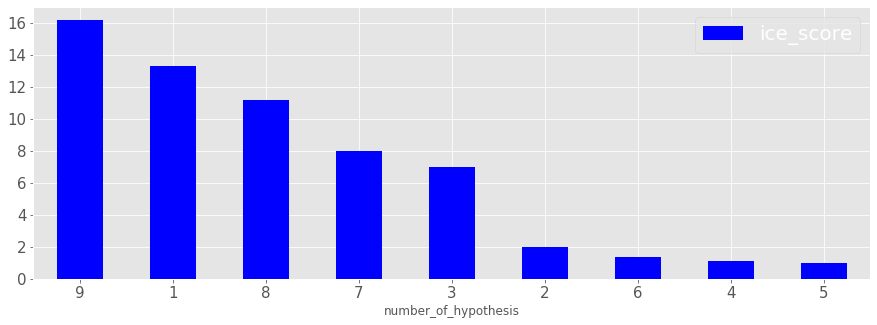

In [4]:
plt.style.use('ggplot')


# применим ICE 
hypothesis['ice_score'] = (hypothesis['impact'] * hypothesis['confidence'] 
                           / hypothesis['efforts'])
# сохраним индексы 
hypothesis['number_of_hypothesis'] = hypothesis.index

# чтобы не было нулевой гипотезы, добавим 1 как дельту
hypothesis['number_of_hypothesis'] = hypothesis['number_of_hypothesis'] + 1

# визуализируем как barplot
hypothesis.\
    sort_values(by='ice_score', ascending=False).\
    plot(x='number_of_hypothesis', y='ice_score', grid=True, figsize=(15,5), 
         kind='bar',color='blue', fontsize = 15)
plt.xticks(rotation=0)
plt.legend(loc=1, prop={'size':20})

Наиболее перспективным на данный момент является 9-е место, но оно не учитывает параметр Reach

The final hypothesis:
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок


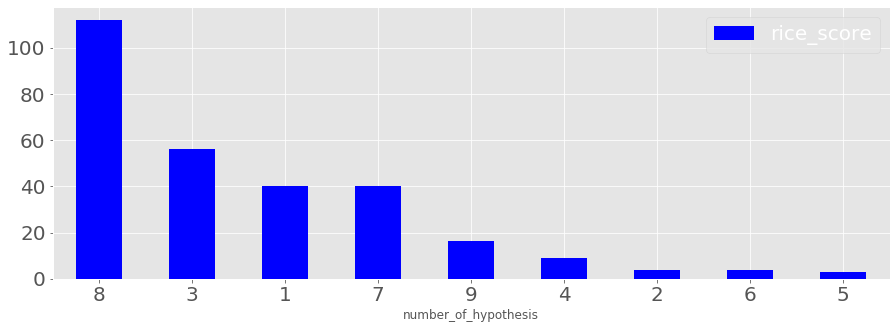

In [5]:
# RICE 
hypothesis['rice_score'] = (hypothesis['reach'] * hypothesis['impact'] * 
                            hypothesis['confidence'] / hypothesis['efforts'])

# визуализируем как barplot
hypothesis.\
    sort_values(by='rice_score', ascending=False).\
    plot(x='number_of_hypothesis', y='rice_score', grid=True, 
         figsize=(15,5), kind='bar',color='blue', fontsize = 20)
plt.xticks(rotation=0)
plt.legend(loc=1, prop={'size':20})

# выводим финальную гипотезу
print('The final hypothesis:')
print('\033[1m' + hypothesis['hypothesis'][7] + '\033[0m')

Похоже, что 8-я гипотеза достигает наибольшего числа пользователей, мы достаточно уверены в ней, и она окажет сопоставимое влияние.


В числе лидирующих есть 3, 1 и 7 гипотезы, но поскольку у них достаточно мало пользователей по сравнению с 8, мы не можем быть в них уверены.


### Часть 2. Анализ A/B-теста.

In [6]:
# загрузка данных и просмотр их
orders = (
    pd.read_csv('/datasets/orders.csv', sep = ',').
    assign(date = lambda x: pd.to_datetime(x['date'], format='%Y-%m-%d'))
)


# выведем общую информацию о датафрейме: 
print_columns_info_missing_values_and_duplicates(orders)
display(orders)

The dataframe includes 5 columns. They are called ['transactionId', 'visitorId', 'date', 'revenue', 'group']
 
---------------------------------------------------------------------------
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None
 
---------------------------------------------------------------------------
 
In column transactionId there are 0 missing values
In column visitorId there are 0 missing values
In column date there are 0 missing values
In column revenue there are 0 missing values
In column group there are 0 missing values
 
---------------------------------------------------------------------------
 
There are 0 duplicates


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [7]:
visitors = (
    pd.read_csv('/datasets/visitors.csv', sep=',').
    assign(date = lambda x: pd.to_datetime(x['date'], format='%Y-%m-%d'))
)


print_columns_info_missing_values_and_duplicates(visitors)
display(visitors)

The dataframe includes 3 columns. They are called ['date', 'group', 'visitors']
 
---------------------------------------------------------------------------
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None
 
---------------------------------------------------------------------------
 
In column date there are 0 missing values
In column group there are 0 missing values
In column visitors there are 0 missing values
 
---------------------------------------------------------------------------
 
There are 0 duplicates


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [8]:
orders_double_group = orders.groupby('visitorId').agg({'group': 'nunique'}).reset_index()
orders_double_group = orders_double_group.loc[orders_double_group['group'] > 1]
orders_double_group.count()


visitorId    58
group        58
dtype: int64

In [9]:
orders.shape

(1197, 5)

In [10]:
print('Доля пользователей с неуникальной группой теста: {:.1%}'.format(orders_double_group['group'].count() / orders.shape[0]))

Доля пользователей с неуникальной группой теста: 4.8%


Вывод: дубликатов в данных не наблюдается, пропущенные значений также нет, Доля пользователей с неуникальной группой теста: 4.8%, поскольку их не так много, то можно их не дропать.

с данными всё отлично, приступим к дальнейшему анализу!

In [11]:
# создание массива уникальных пар групп и дат
dates_groups = orders[['date', 'group']].drop_duplicates()
# совокупные данные заказа по датам

orders_aggregated = dates_groups.apply(lambda x: 
                        orders[np.logical_and(orders['date'] <= x['date'], 
                                              orders['group'] == x['group'])]\
                        .agg({'date':'max', 'group':'max', 
                              'transactionId': pd.Series.nunique, 
                        'visitorId':pd.Series.nunique, 'revenue':'sum'}), axis=1).\
                        sort_values(by=['date', 'group'])

# подсчет общего количества посетителей в день
 
visitors_aggregated = dates_groups.apply(lambda x: 
                                        visitors[np.logical_and(visitors['date']<= x['date'], 
                                        visitors['group'] == x['group'])]\
                                        .agg({'date':'max', 'group':'max', 
                                              'visitors':'sum'}), axis=1).\
                                        sort_values(by=['date','group'])

# объединение предыдущих результатов в dataframe
cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date', 'group'])

# переименование колонок
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulative_data.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


#### Визуализация совокупной выручки по группам

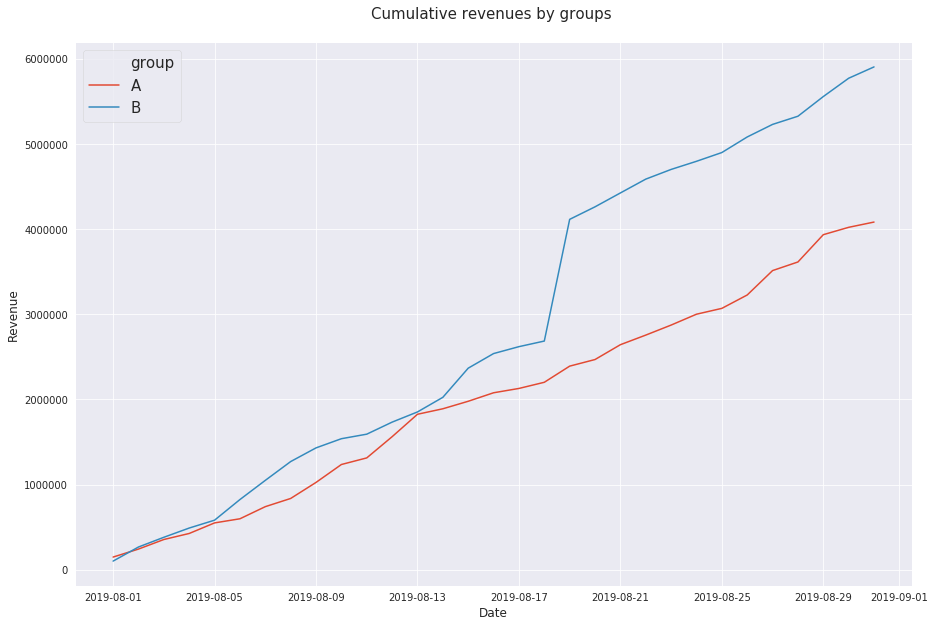

In [12]:
sns.set_style("dark")
plt.figure(figsize=(15,10))
sns.lineplot(x=cumulative_data['date'], y=cumulative_data['revenue'], 
             hue=cumulative_data['group'])
plt.title('Cumulative revenues by groups '+'\n', fontsize=15)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.legend(prop={'size': 15})
plt.show()

В течение первых четырех дней тестирования выручка для групп была примерно одинаковой, но после этого выручка для группы B начала расти быстрее, чем для группы A

к концу второй недели теста выручка группы снова была примерно такой же, но позже группа B резко увеличилась 17 августа.



Выручка пользователей, как в группе А, так и в группе Б растёт стабильно вверх, отсюда вывод, что выручка обоих групп стабилизировалась с положительной динамикой


#### Построение кумулятивных средних поступлений по группам

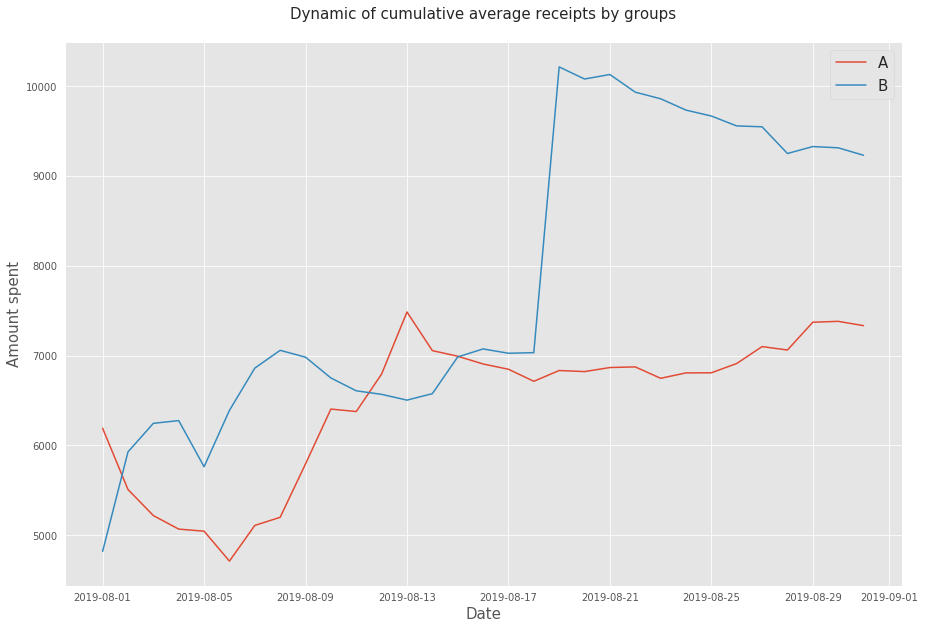

In [13]:
# создание фреймов данных, которые будут включать в себя совокупное количество посещений и заказов
cumulative_revenue_a = cumulative_data[cumulative_data['group'] == 'A'][['date', 
                                                                         'revenue', 'orders']]
cumulative_revenue_b = cumulative_data[cumulative_data['group'] == 'B'][['date', 
                                                                         'revenue', 'orders']]

# построение динамики средней выручки по группам
plt.style.use("ggplot")
plt.figure(figsize=(15,10))
plt.plot(cumulative_revenue_a['date'], (cumulative_revenue_a['revenue'] / 
                                        cumulative_revenue_a['orders']), label='A')
plt.plot(cumulative_revenue_b['date'], (cumulative_revenue_b['revenue'] / 
                                        cumulative_revenue_b['orders']), label='B')
plt.title('Dynamic of cumulative average receipts by groups'+'\n', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Amount spent', fontsize=15)
plt.legend(prop={'size':15}) 
plt.show()

До 17 августа динамика средних накопленных поступлений примерно аналогична, но меняется около 17 августа.

В группе Б мы снова видим резкий рост среднего чека в период с 17 по 21 августа, но затем он «возвращается к среднему»

#### Построение динамики совокупной средней выручки в относительном выражении

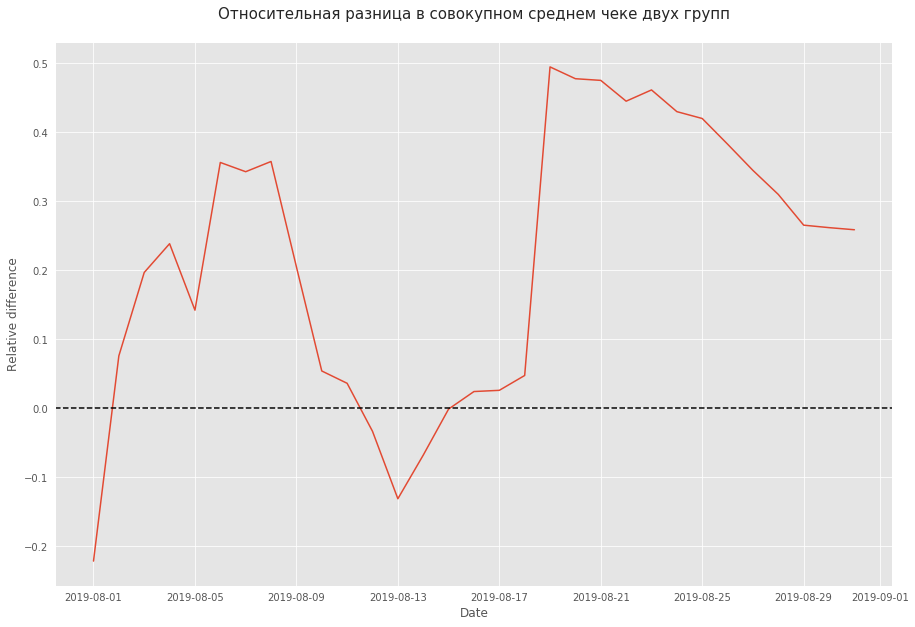

In [14]:
# сбор данных о средних чеках в dataframe
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b, left_on='date', right_on='date', suffixes=['A','B']
)

# построение относительной разницы
merged_cumulative_revenue
plt.figure(figsize=(15,10))
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB'] / 
                                             merged_cumulative_revenue['ordersB']) / 
                                            (merged_cumulative_revenue['revenueA'] / 
                                             merged_cumulative_revenue['ordersA'])-1)
plt.title('Относительная разница в совокупном среднем чеке двух групп'+'\n', 
         fontsize=15)
plt.axhline(y=0, color='black', linestyle='--')
plt.ylabel('Relative difference')
plt.xlabel('Date')
plt.grid(True)
plt.show()

До 17 августа взаимосвязь между относительными изменениями средних проверок по группам не была установлена, но после 17 августа в группе В произошло что-то ненормальное, что значительно увеличило средний чек этой группы по отношению к среднему чеку. группа А

#### Построение динамики кумулятивных конверсий по группам

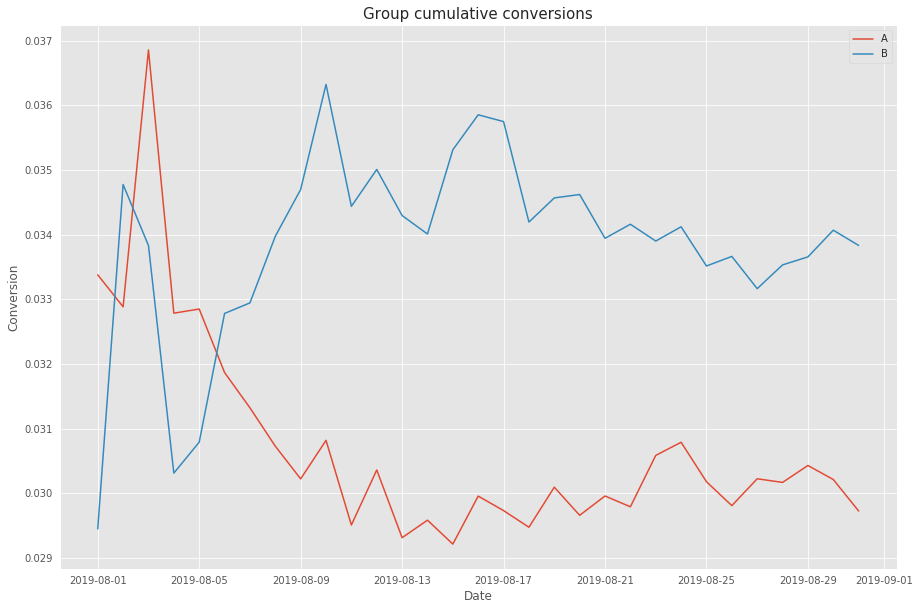

In [15]:
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']
plt.figure(figsize=(15,10))
plt.plot(cumulative_data_a['date'],
        cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], 
        cumulative_data_b['conversion'], label='B')
plt.title('Group cumulative conversions', fontsize=15)
plt.xlabel('Date')
plt.ylabel('Conversion')
plt.legend()
plt.grid(True)
plt.show()

В течение первых двух дней группы колебались около одного и того же значения.

После 5 августа коэффициент конверсии группы Б стал выше и оставался выше на протяжении всего теста.

#### Относительная разница в накопленных конверсиях между группами

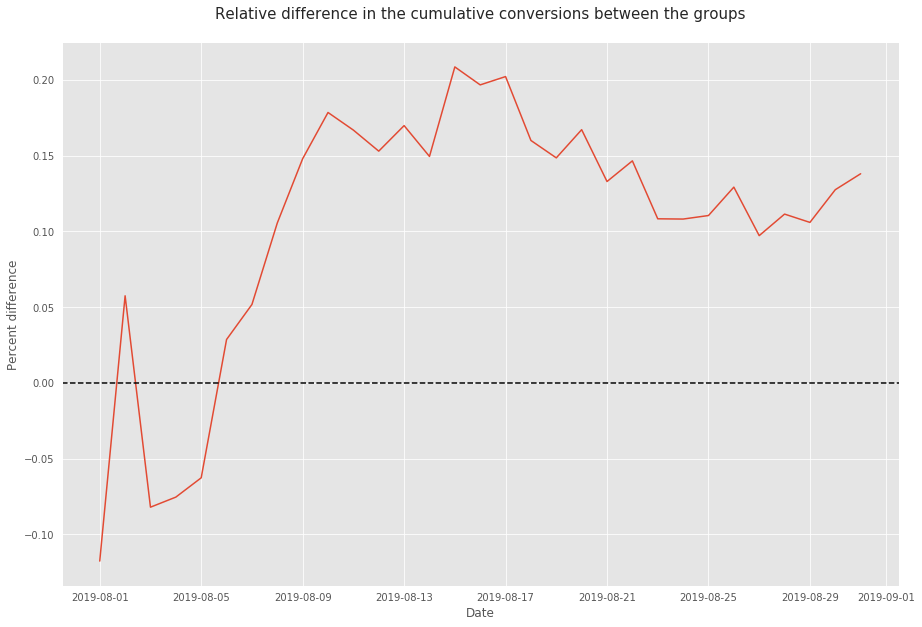

In [16]:
# сделаем датафрейм с конверсиями по обеим группам
merged_cumulative_conversions = cumulative_data_a[['date', 'conversion']].\
merge(cumulative_data_b[['date', 'conversion']], left_on='date', 
      right_on='date', how='left', suffixes=['A', 'B'])

# построим график 
plt.figure(figsize=(15,10))
plt.plot(merged_cumulative_conversions['date'],
        (merged_cumulative_conversions['conversionB']/
        merged_cumulative_conversions['conversionA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Percent difference')
plt.title('Relative difference in the cumulative conversions between the groups'+'\n', 
          fontsize=15)
plt.grid(True)
plt.show()

В течение первой недели теста конверсия колебалась, и по данным было невозможно сделать вывод

После первой недели тестирования коэффициент конверсии группы B стал превосходить группу A и на данный момент он выше примерно на 10-15%


Коэффициент конверсии уже зафиксирован, можно сделать вывод, что коэффициент конверсии в группе B выше


#### Давайте более внимательно изучим заказы. Построение распределения количества заказов

Ten most frequent users:
         user_id  orders
1023  4256040402  11    
591   2458001652  11    
569   2378935119  9     
487   2038680547  8     
44    199603092   5     
744   3062433592  5     
55    237748145   5     
917   3803269165  5     
299   1230306981  5     
897   3717692402  5     


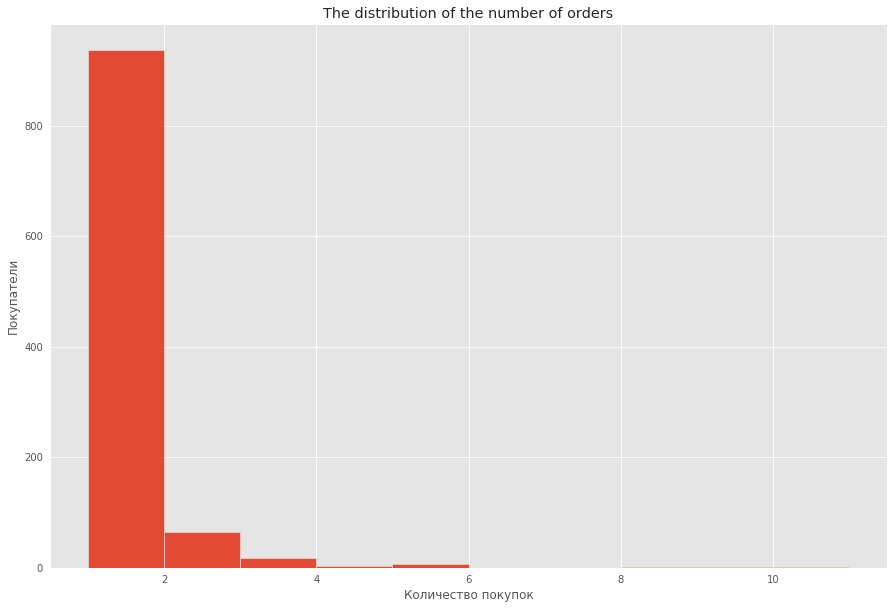

In [17]:
# сколько раз средний пользователь покупает?
orders_by_users = orders.drop(['group', 'revenue', 'date'], axis=1).\
groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
orders_by_users.columns = ['user_id', 'orders']

# кто самые частые пользователи?
print('Ten most frequent users:')
print(orders_by_users.sort_values(by='orders', ascending=False).\
      head(10))

# распределение количества заказов
plt.figure(figsize=(15,10))
plt.title('The distribution of the number of orders')
plt.hist(orders_by_users['orders'])
plt.xlabel('Количество покупок')
plt.ylabel('Покупатели')
plt.grid(True)
plt.show()

Ten most frequent users:
         user_id  orders
1023  4256040402  11    
591   2458001652  11    
569   2378935119  9     
487   2038680547  8     
44    199603092   5     
744   3062433592  5     
55    237748145   5     
917   3803269165  5     
299   1230306981  5     
897   3717692402  5     


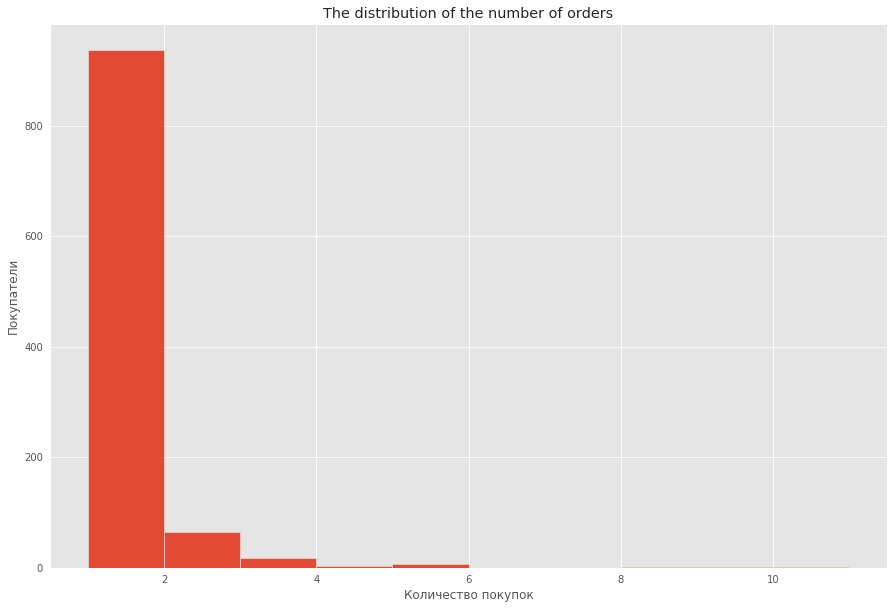

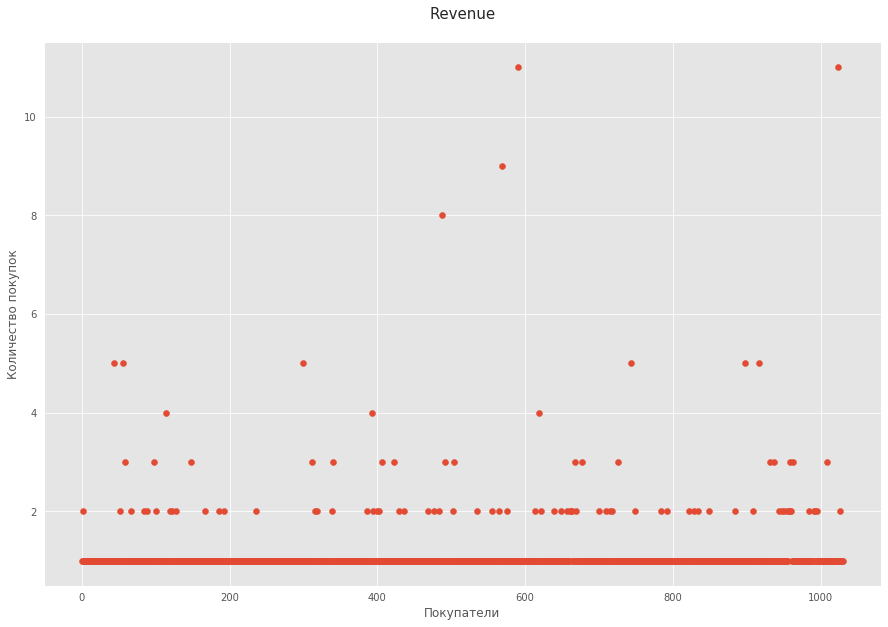

In [18]:
# сколько раз средний пользователь покупает?
orders_by_users = orders.drop(['group', 'revenue', 'date'], axis=1).\
groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
orders_by_users.columns = ['user_id', 'orders']

# кто самые частые пользователи?
print('Ten most frequent users:')
print(orders_by_users.sort_values(by='orders', ascending=False).\
      head(10))

# распределение количества заказов
plt.figure(figsize=(15,10))
plt.title('The distribution of the number of orders')
plt.hist(orders_by_users['orders'])
plt.xlabel('Количество покупок')
plt.ylabel('Покупатели')
plt.grid(True)
plt.show()

#--------------------------------




y_values = pd.Series(range(0, len(orders_by_users)))
plt.figure(figsize=(15,10))
plt.scatter(y_values, orders_by_users['orders'])
plt.title('Revenue'+'\n', 
          fontsize=15)
plt.xlabel('Покупатели')
plt.ylabel('Количество покупок')
plt.grid(True)
plt.show()

Большинство пользователей заказали один раз


Интересно, что значительное количество пользователей заказывали от 2 до 4 раз. Чтобы понять, следует ли считать количество заказов от 2 до 4 ненормальным, нам необходимо вычислить перцентили.

#### Расчет 95-го и 99-го перцентилей заказов

In [19]:
print(np.percentile(orders_by_users['orders'], [95,99]))

[2. 4.]


Не более 5 процентов пользователей сделали более 2 заказов


Не более 1 процента пользователей делают 4 и более заказа


Оставим 2 как нижнюю границу


#### График разброса дохода:

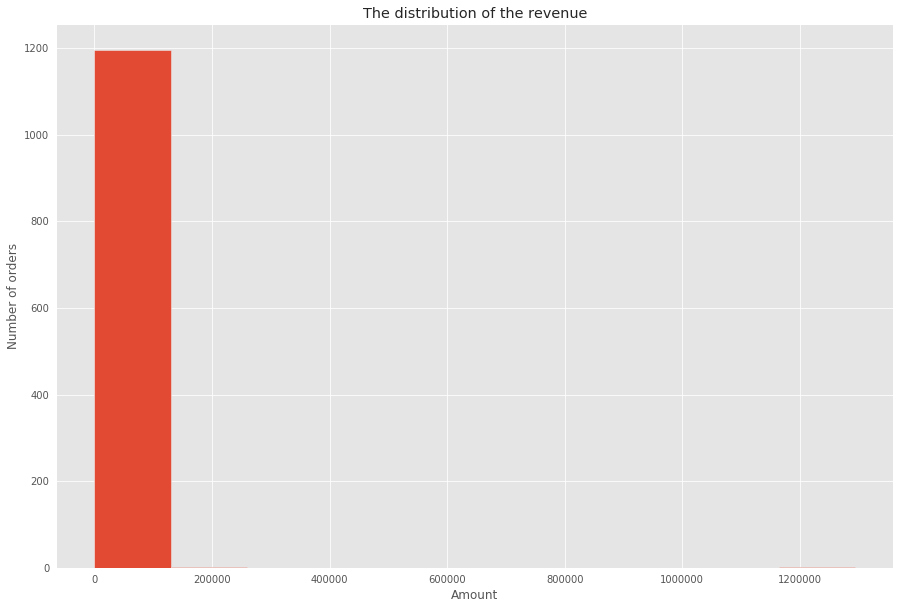

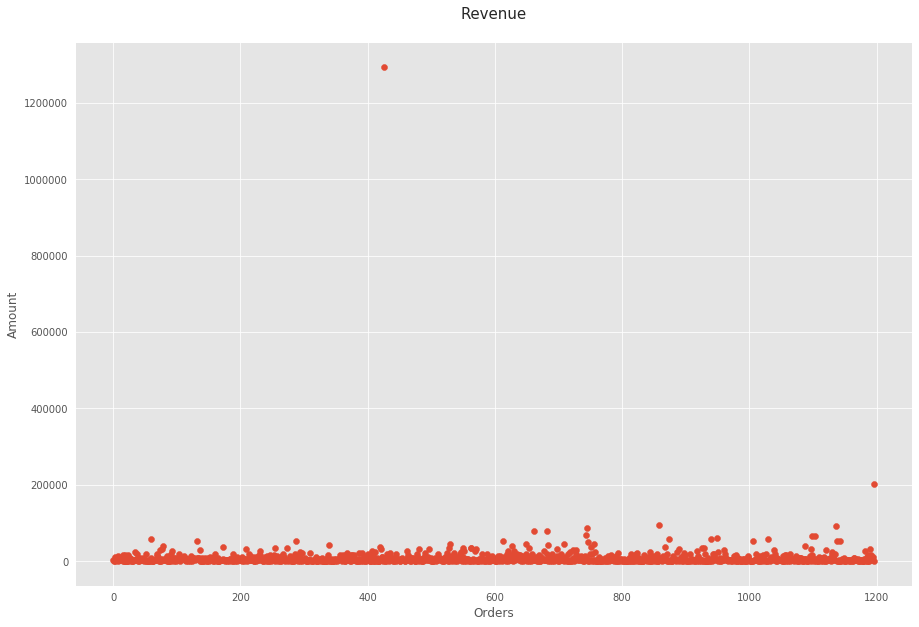

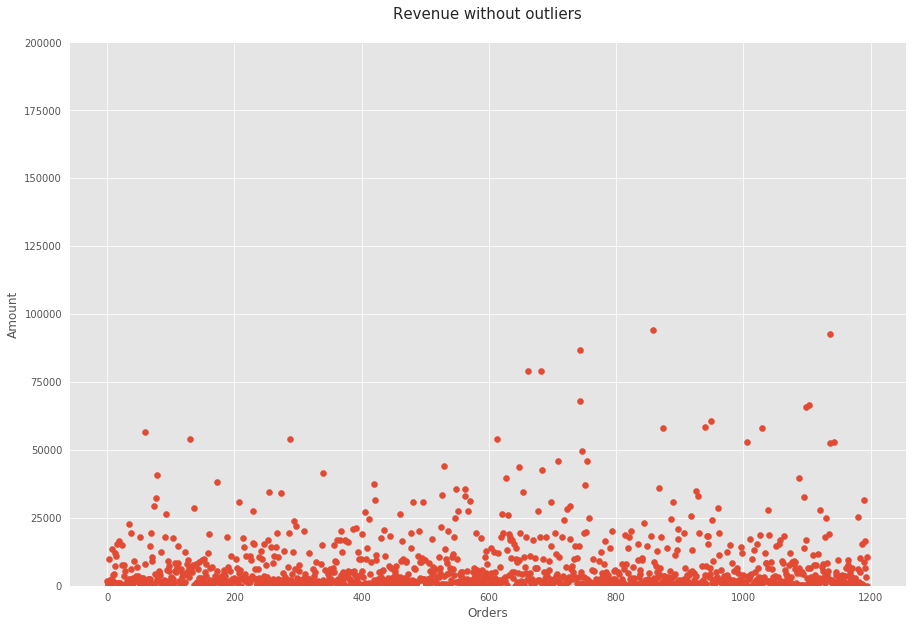

In [20]:
# распределение доходов
plt.figure(figsize=(15,10))
plt.title('The distribution of the revenue')
plt.hist(orders['revenue'])
plt.xlabel('Amount')
plt.ylabel('Number of orders')
plt.grid(True)
plt.show()


x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(15,10))
plt.scatter(x_values, orders['revenue'])
plt.title('Revenue'+'\n', 
          fontsize=15)
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

# есть два необычных заказа: один на сумму более 1 миллиона, а другой около 200 тысяч
# давайте посмотрим на диаграмму рассеяния без них
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(15,10))
plt.ylim(0, 200000)
plt.scatter(x_values, orders['revenue'])
plt.title('Revenue without outliers'+'\n', 
          fontsize=15)
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

Почти все заказы меньше 50000.


Есть два выброса


In [21]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


#### Различаются ли групповые конверсии статистически значимо?


In [22]:
for df in [orders, visitors]:
    display(df.info(), df.columns.to_list())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

['transactionId', 'visitorId', 'date', 'revenue', 'group']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

['date', 'group', 'visitors']

#### Формулировка нулевой и альтернативной гипотез:


H0: конверсия в группе A не отличается от конверсии в группе B

H1: конверсии в двух группах различаются


In [23]:
# вычисление количества пользователей в данный день для группы A
# для проведения статистического теста нам потребуются люди, которые купили и люди,
# кто был у нас, но не купил
visitors_a_daily = visitors[visitors['group'] == "A"][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']
orders_by_users_a = orders[orders['group'] == 'A'].groupby('visitorId', 
                                                           as_index=False)\
.agg({'transactionId': pd.Series.nunique})

# переименование столбцов
orders_by_users_a.columns = ['user_id', 'orders']

# объединение данных пользователей с серией, которая будет содержать нули для всех, кто посетил, но не купил

sample_a = pd.concat([orders_by_users_a['orders'], 
                      pd.Series(0, index=np.arange(
                          visitors_a_daily['visitors_per_date_a']\
                           .sum() - len(orders_by_users_a['orders'])),
                                name='orders')], axis=0)

# то же самое для группы B
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']
orders_by_users_b = orders[orders['group'] == 'B'].groupby('visitorId', 
                                                           as_index=False)\
.agg({'transactionId':pd.Series.nunique})

# переименование столбцов
orders_by_users_b.columns = ['user_id', 'orders']
sample_b = pd.concat([orders_by_users_b['orders'], 
                      pd.Series(0, index=np.arange(
                          visitors_b_daily['visitors_per_date_b']\
                            .sum() - len(orders_by_users_b['orders'])),
                                name='orders')], axis=0)

# наше распределение не похоже на нормальное, поэтому нам нужен тест Манна-Уитни
mw_conversion_test_with_outliers = stats.mannwhitneyu(sample_a, sample_b, alternative = 'two-sided')
alpha = 0.05
print('p-value: {0:.3f}'.format(
    mw_conversion_test_with_outliers.pvalue))

if mw_conversion_test_with_outliers.pvalue < alpha:
    print('Отклонение нуля')
else:
    print('Невозможно отклонить нуль')

# относительная разница в конверсиях
print('В группе А конверсия ниже на {0:.2%}'.\
      format(sample_a.mean()/sample_b.mean()-1))

p-value: 0.017
Отклонение нуля
В группе А конверсия ниже на -12.13%


In [24]:
# Отношение группы В к А
print('В группе B конверсия выше на {0:.2%}'.\
      format(abs(sample_b.mean()/sample_a.mean()-1)))

В группе B конверсия выше на 13.81%


#### Различаются ли средние чеки в группах статистически значимо?

H0: средний чек не отличаются


H1: средний чек в двух группах различаются


Перед проведением статистического теста рассмотрим распределения


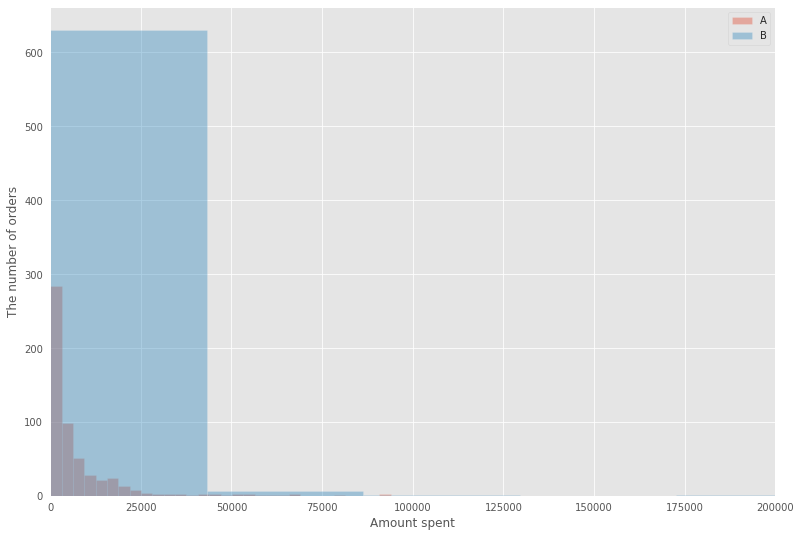

In [25]:
plt.figure(figsize=(13,9))
sns.distplot(orders[orders['group']=='A']['revenue'], 
            kde=False, bins=30, label='A')
sns.distplot(orders[orders['group']=='B']['revenue'],
            kde=False, bins=30, label='B')
plt.xlim(0, 200000)
plt.ylabel('The number of orders')
plt.xlabel('Amount spent')
plt.legend()
plt.grid(True)
plt.show()

Нам нужно избавиться от выбросов и еще раз просмотреть распределения.

In [26]:
mw_av_receipt_test_with_outliers = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                                      orders[orders['group']=='B']['revenue'], alternative = 'two-sided')

# p-value
print('p-value: {0:.3f}'.format(mw_av_receipt_test_with_outliers.pvalue))


if mw_av_receipt_test_with_outliers.pvalue < alpha:
    print('Rejecting the null')
else:
    print('Failling to reject the null')

# относительная разница в средних поступлениях
diff_in_av_receipts = (orders[orders['group']=='B']
    ['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean()- 1)

print('Средний чек в группе B составляет {0:.2%} выше, чем в группе А'.format(diff_in_av_receipts))

p-value: 0.729
Failling to reject the null
Средний чек в группе B составляет 25.87% выше, чем в группе А


средний чек не отличаются статистически значимо


однако средний чек в группе B почти на 26% выше.


#### Избавимся от выбросов и повторим тесты

In [27]:
orders_by_users = orders.groupby('visitorId', as_index=False).\
agg({'transactionId':pd.Series.nunique})

# берем только пользователей, заказавших не более 2 раз
users_with_many_orders = orders_by_users[orders_by_users['transactionId'] > np.\
                                         percentile(orders_by_users['transactionId'], 
                                                    95)]['visitorId']

# и потратил не более 28 тыс.
users_with_expensive_orders = orders[orders['revenue'] > np.\
                                    percentile(orders['revenue'], 95)]['visitorId']

# # объединение их в один dataframe  
abnormal_users = pd.concat([users_with_many_orders, users_with_expensive_orders],
                           axis=0).drop_duplicates().sort_values()

print(abnormal_users.head(3), 
      abnormal_users.shape)

# фильтрация данных
sample_a_filtered = pd.concat([orders_by_users_a[np.logical_not(
    orders_by_users_a['user_id'].isin(abnormal_users))]['orders'], 
    pd.Series(0, index=np.arange(visitors_a_daily['visitors_per_date_a']\
            .sum() - len(orders_by_users_a['orders'])),
                name='orders')], axis=0)
    
sample_b_filtered = pd.concat([orders_by_users_b[np.logical_not(
    orders_by_users_b['user_id'].isin(abnormal_users))]['orders'], 
    pd.Series(0, index=np.arange(visitors_b_daily['visitors_per_date_b']\
            .sum() - len(orders_by_users_b['orders'])),
                name='orders')], axis=0)

1099    148427295
44      199603092
928     204675465
Name: visitorId, dtype: int64 (83,)


In [28]:
mw_conversion_test_without_outliers = stats.mannwhitneyu(sample_a_filtered, 
                                                         sample_b_filtered, alternative = 'two-sided')
alpha = 0.05
print('p-value {0:.3f}'.format(mw_conversion_test_without_outliers.pvalue))
if mw_conversion_test_without_outliers.pvalue < alpha:
    print('Rejecting the null')
else:
    print('Failing to reject the null')
print('Конверсия группы A ниже на {0:.2%}'.\
      format(abs(sample_a_filtered.mean()/sample_b_filtered.mean()-1)))

p-value 0.012
Rejecting the null
Конверсия группы A ниже на 14.94%


Основываясь на результатах статистического непараметрического критерия Манна-Уитни для данных с выбросами и без них, можно сделать вывод, что конверсия в группе B выше, и это статистически значимая разница

#### Различаются ли средние поступления на данных без выбросов?

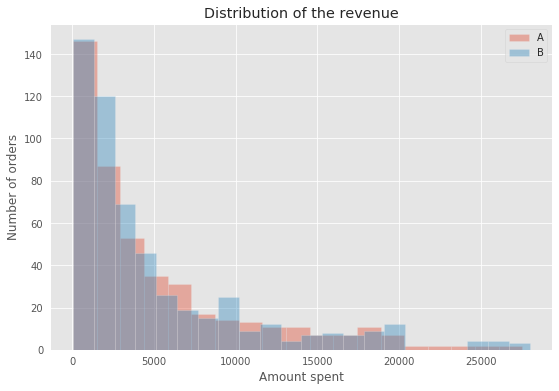

In [29]:
plt.figure(figsize=(9,6))
sns.distplot(orders[np.logical_and(
        orders['group']=="A",
        np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'],
             label="A", kde=False)
sns.distplot(orders[np.logical_and(
        orders['group']=="B",
        np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'], 
             label="B", kde=False)
plt.ylabel('Number of orders')
plt.xlabel('Amount spent')
plt.title('Distribution of the revenue')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# Тест Манна Уитни
mw_av_receipt_test_without_outliers = stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=="A",
        np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(
        orders['group']=="B",
        np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'], alternative = 'two-sided')
print('p-value: {0:.3f}'.format(mw_av_receipt_test_without_outliers.pvalue))
if mw_av_receipt_test_without_outliers.pvalue < alpha:
    print('Rejecting the null')
else:
    print('Failed to reject the null')


# посчитаем относительное разиличие в чеках
print('В группе А конверсия ниже на {0:.2%}'.format(
    abs(orders[np.logical_and(orders['group']=='B',
                              np.logical_not(orders['visitorId'].\
                                             isin(abnormal_users)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].\
                       isin(abnormal_users)))]['revenue'].mean() - 1)))

p-value: 0.753
Failed to reject the null
В группе А конверсия ниже на 2.21%


Мы все еще не можем отвергнуть нулевые гипотезы, однако мы могли видеть, что большое разнообразие было связано с выбросами.

<font face='Liberation serif' size=4>**Проведенный анализ позволяет сделать следующие выводы:** </font>

К концу второй недели выручка по группам была примерно равной, но позже у группы Б 17 августа произошел резкий рост, что было вызвано аномально большим заказом (более 1 миллиона 200 тысяч). Статистически значимой разницы в размере средних чеков по группам нет.

После 5 августа конверсия группы Б стала выше, а позже была зафиксирована. Мы получили статистически значимую разницу в конверсиях двух групп.


<font face='Liberation serif' size=4>**Общий вывод:** </font>

Наблюдается статистическое значимое различие по конверсии между группами как по «сырым», так и по данным после фильтрации аномалий;
Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
График различия конверсии между группами сообщает, что результаты группы B лучше результатов группы A, но в тоже время наблюдается тенденция к снижению;
График различия среднего чека говорит о том, что результаты группы B показывают намного лучше результаты, чем группа A, но в тоже время они тоже снижаются.
Исходя из обнаруженных фактов, тест следует остановить и признать победу за группой B. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент A станет на самом деле лучше сегмента B — практически нулевая.

<font face='Liberation serif' size=4>**Общий вывод (попытка №2):** </font>

Перед нами стояла цель приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. В нашем распоряжении были следующие данные:

<font face='Liberation serif' size=4>**Данные для первой части:** </font>

Файл /datasets/hypothesis.csv :\
• Hypothesis — краткое описание гипотезы;\
• Reach — охват пользователей по 10-балльной шкале;\
• Impact — влияние на пользователей по 10-балльной шкале;\
• Confidence — уверенность в гипотезе по 10-балльной шкале;\
• Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

<font face='Liberation serif' size=4>**Данные для второй части:** </font>

Файл /datasets/orders.csv :\
• transactionId — идентификатор заказа;\
• visitorId — идентификатор пользователя, совершившего заказ;\
• date — дата, когда был совершён заказ;\
• revenue — выручка заказа;\
• group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv :\
• date — дата;\
• group — группа A/B-теста;\
• visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Данные видоизменил совсем немного: В данных hypothesis все колонки привёл к нижнему регистру для удобности, далее привёл к нужному типу некоторые столбцы (например date).\
Выяснил, что % пользователей, попавших в обе группы теста составялет 4.8%, это не так много, поэтому решил их не дропать.
Анализировал данные с помощью анализа бизнес-метрик и проверки различных гипотез.\
Я обнаружил, что 8-ая гипотеза достигает наибольшего числа пользователей и поэтому она окажет сопоставимое влияние.\
После первой недели тестирования коэффициент конверсии группы B стал превосходить группу A и на данный момент он выше примерно на 10-15%, что не может нас не радовать!\
Мы выяснили, что не более 5 процентов пользователей сделали более 2 заказов и почти все заказы меньше 50000₽.\
В группе B конверсия выше на 13.81%\
Средний чек не отличаются статистически значимо, однако средний чек в группе B почти на 26% выше.
Конверсия группы A ниже на 14.94%
После 5 августа конверсия группы Б стала выше, а позже была зафиксирована. Мы получили статистически значимую разницу в конверсиях двух групп.





